# Example usage

Running the FRAGMENT-MNP model is a two-step process. First, the model must be initialised by passing it config and input data. Example config and data is given in the [``fragmentmnp.examples`` module](./developers/api.html#example-config-and-data-fragmentmnp-examples), which is used here. Then the ``FragmentMNP.run()`` method runs the model and returns a [``FMNPOutput``](./developers/api.html#fragment-mnp-output) object with the output data.

In [17]:
from fragmentmnp import FragmentMNP
from fragmentmnp.examples import minimal_config, minimal_data
import matplotlib.pyplot as plt
import numpy as np

# Create the model and pass it config and data. minimal_config and
# minimal_data are an examples of a dicts with only required values.
# full_{config|data} are examples of a dicts with all values given
fmnp = FragmentMNP(minimal_config, minimal_data)
# Run the model
output = fmnp.run()

{'average': 0.0005, 'alpha_s': 10}


The returned `FMNPOutput` object contains a timeseries `t`, particle mass and number concentrations for each size class, `c` and `n`, particle number concentration lost from each size class due to dissolution `n_diss`, and corresponding concentration of dissolved organics from each size class `c_diss`. See the [API reference for full details](./developers/api.html#fragment-mnp-output). A convenient plotting function can be used to quickly plot model output (see [](./plotting.ipynb)):

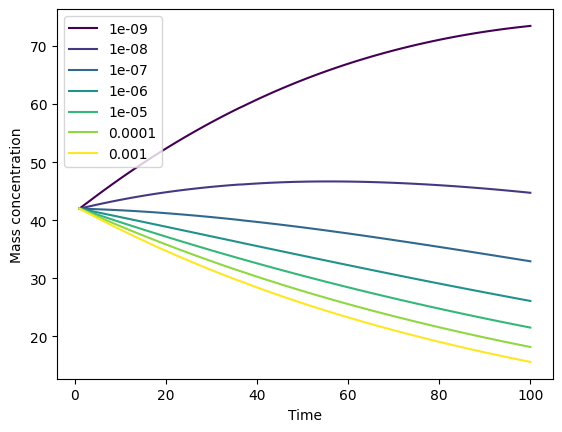

In [3]:
# Plot the time evolution of mass concentrations
_ = output.plot()

We can also plot the particle number concentrations `n`. Note the logged y-axis:

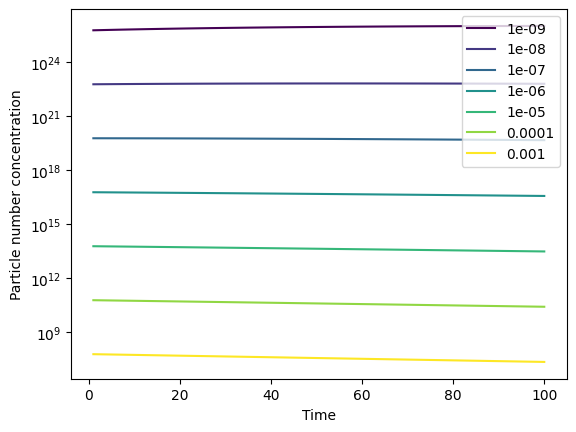

In [4]:
_ = output.plot(type='particle_number_conc', log_yaxis=True)

## Dissolution

The example data has a dissolution rate `k_diss` of 0. Let's simulate dissolution by setting this to an average (median) of 0.001, and use the `k_diss_scaling_method` config parameter set to `surface_area` to scale this by the surface area to volume ratio (the default is `constant`). We will keep `k_diss_gamma` set to the default of 1, such that `k_diss` is directly proportional to surface area to volume ratio.

In [1]:
from fragmentmnp import FragmentMNP
from fragmentmnp.examples import minimal_config, minimal_data

# Change the dissolution parameters
minimal_config['n_timesteps'] = 10
minimal_data['k_diss'] = {
    'average': 0.0005,
    'alpha_s': 2
}
# minimal_config['k_diss_scaling_method'] = 'surface_area'

# Rerun the model
fmnp = FragmentMNP(minimal_config, minimal_data)
output = fmnp.run()

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
{}
[[9.36480475e-176 9.36480475e-176 9.36480475e-176 9.36480475e-176
  9.36480475e-176 9.36480475e-176 9.36480475e-176 9.36480475e-176
  9.36480475e-176 9.36480475e-176]
 [9.36480475e-156 9.36480475e-156 9.36480475e-156 9.36480475e-156
  9.36480475e-156 9.36480475e-156 9.36480475e-156 9.36480475e-156
  9.36480475e-156 9.36480475e-156]
 [9.36480475e-136 9.36480475e-136 9.36480475e-136 9.36480475e-136
  9.36480475e-136 9.36480475e-136 9.36480475e-136 9.36480475e-136
  9.36480475e-136 9.36480475e-136]
 [9.36480475e-116 9.36480475e-11

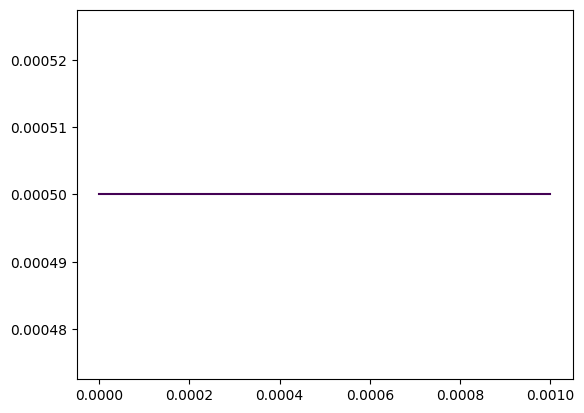

In [16]:
import matplotlib.pyplot as plt

plt.plot(fmnp.psd, fmnp.k_diss[:, -1])

Dissolution data is included in the `FMNPOutput` class: `n_diss` is a timeseries of particle number concentrations lost from each size class, and `c_diss` is corresponding mass concentration assuming spherical particles. We can use the ``FMNPOutput.plot()`` method again to plot the time evolution graph with dissolution mass concentrations:

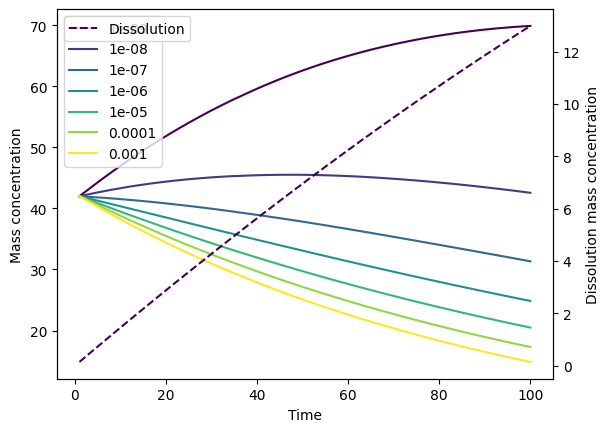

In [12]:
# Plot the model outputs with dissolution included
_ = output.plot(plot_dissolution=True)